In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pickle
from sklearn.metrics import mean_squared_error

In [6]:
#data = pd.read_csv(r"E:\CDAC\Project\Pune.csv")
#from google.colab import drive
#drive.mount('/content/drive')
# Load the file from Google Drive
#data = pd.read_csv("/content/drive/MyDrive/Datasets - Colab/Pune.csv")
data=pd.read_csv('/kaggle/input/temp-data/Mumbai.csv')

In [7]:
#checking columns
data.columns

Index(['Date', 'PS', 'PSC', 'T2M', 'T2MWET', 'T2MDEW', 'WS2M', 'WD2M', 'WD10M',
       'WS10M', 'QV2M', 'RH2M', 'PRECTOTCORR'],
      dtype='object')

In [8]:
#dropping unrequired features
data=data.drop(['T2MDEW', 'T2MWET', 'PS', 'PSC', 'WS2M', 'QV2M', 'RH2M', 'PRECTOTCORR', 'WD2M', 'WD10M', 'WS10M'], axis=1)
data.head()

,Date,T2M
0,2004010109,26.31
1,2004010114,30.86
2,2004010406,14.44
3,2004010408,20.89
4,2004010410,28.41


In [9]:
# convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d%H')
data.head()

,Date,T2M
0,2004-01-01 09:00:00,26.31
1,2004-01-01 14:00:00,30.86
2,2004-01-04 06:00:00,14.44
3,2004-01-04 08:00:00,20.89
4,2004-01-04 10:00:00,28.41


In [10]:
#changing index to date
data.index = data['Date']
data.head()

,Date,T2M
Date,,
2004-01-01 09:00:00,2004-01-01 09:00:00,26.31
2004-01-01 14:00:00,2004-01-01 14:00:00,30.86
2004-01-04 06:00:00,2004-01-04 06:00:00,14.44
2004-01-04 08:00:00,2004-01-04 08:00:00,20.89
2004-01-04 10:00:00,2004-01-04 10:00:00,28.41


In [11]:
data=data.sort_index()

In [12]:
data.head()

,Date,T2M
Date,,
2004-01-01 05:00:00,2004-01-01 05:00:00,17.09
2004-01-01 06:00:00,2004-01-01 06:00:00,16.89
2004-01-01 07:00:00,2004-01-01 07:00:00,18.99
2004-01-01 08:00:00,2004-01-01 08:00:00,22.87
2004-01-01 09:00:00,2004-01-01 09:00:00,26.31


In [13]:
#Renaming columns
data.rename(columns={'T2M': 'TEMP'}, inplace=True)

In [14]:
#checking for duplicated entried
data.duplicated().sum()

120

In [15]:
#dropping duplicate values
data=data.drop_duplicates()
data.duplicated().sum()

0

In [16]:
data.tail()

,Date,TEMP
Date,,
2024-02-19 00:00:00,2024-02-19 00:00:00,23.40
2024-02-19 01:00:00,2024-02-19 01:00:00,22.89
2024-02-19 02:00:00,2024-02-19 02:00:00,22.24
2024-02-19 03:00:00,2024-02-19 03:00:00,21.76
2024-02-19 04:00:00,2024-02-19 04:00:00,21.55


In [17]:
data=data[:-5]
data.tail()

,Date,TEMP
Date,,
2024-02-18 19:00:00,2024-02-18 19:00:00,26.86
2024-02-18 20:00:00,2024-02-18 20:00:00,25.91
2024-02-18 21:00:00,2024-02-18 21:00:00,25.19
2024-02-18 22:00:00,2024-02-18 22:00:00,24.60
2024-02-18 23:00:00,2024-02-18 23:00:00,23.96


In [18]:
data.count()

Date    176491
TEMP    176491
dtype: int64

In [19]:
# Splitting data into train and test sets
train_data = data[:8760]  # 1 year data
test_data = data[8760:8808]   # Use the last 48 hours for testing

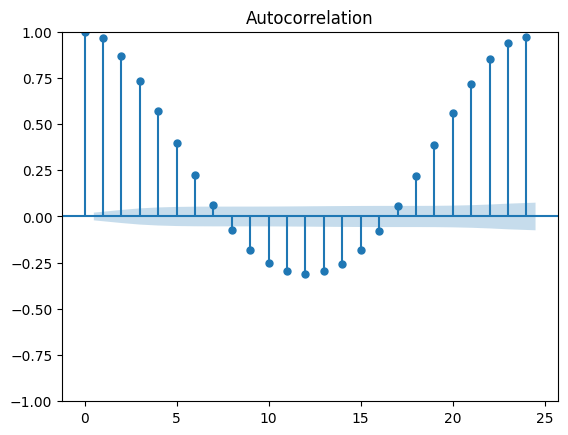

In [20]:
#plotting autocorrelation graph
plot_acf(train_data["TEMP"], lags=24, )
plt.show()

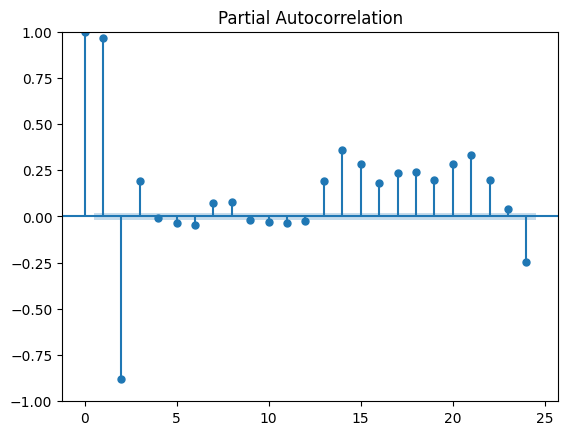

In [21]:
#plotting partial autocorrelation graph
plot_pacf(train_data["TEMP"], lags=24)
plt.show()

In [22]:
# SARIMA model parameters
order = (1, 1, 1)  # ARIMA parameters (p, d, q)
seasonal_order = (1, 1, 1, 24)  # SARIMA parameters (P, D, Q, S)

In [23]:
#to store RMSE after every year
rmse_record={}

In [24]:
# Fit SARIMA model
mumbai_model = SARIMAX(train_data["TEMP"], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False, dates=train_data["Date"])
mumbai_result = mumbai_model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.30005D-02    |proj g|=  3.58407D-01

At iterate    5    f=  5.61030D-02    |proj g|=  3.94269D-01

At iterate   10    f=  2.48583D-02    |proj g|=  4.39436D-02

At iterate   15    f=  2.46334D-02    |proj g|=  5.80349D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     28      1     0     0   7.344D-06   2.463D-02
  F =   2.4632717584090275E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [25]:
# Forecast temperatures for the next 48 hours
forecast = mumbai_result.get_forecast(steps=48)

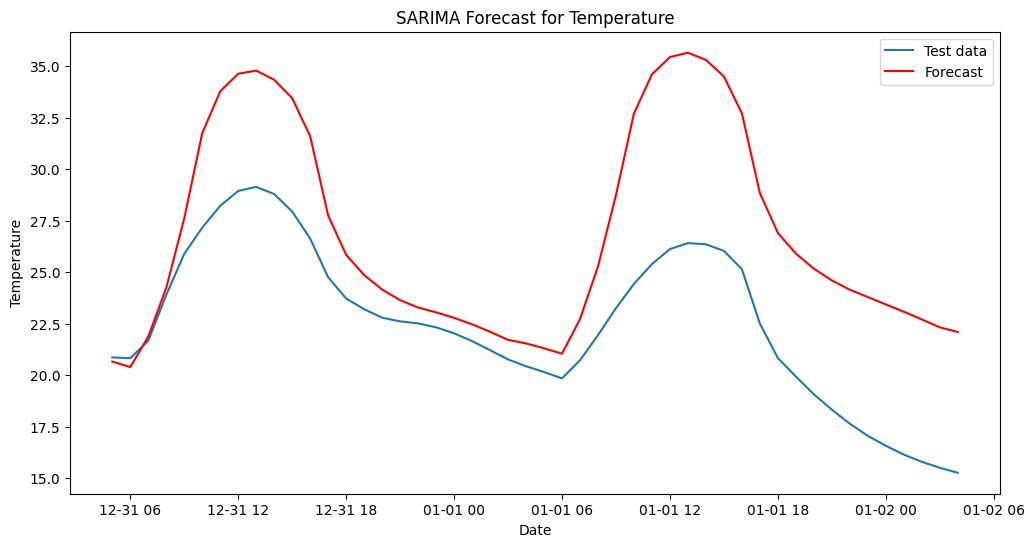

In [26]:
# Plot the predicted values along with the actual values
plt.figure(figsize=(12, 6))
#plt.plot(check.index, check["TEMP"], label='Train data')
plt.plot(test_data.index, test_data["TEMP"], label='Test data')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
#plt.plot(forecast.index, forecast.predicted_mean, label='Forecast', color='red')
#plt.fill_between(forecast.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.5)
plt.title('SARIMA Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [27]:
rmse = np.sqrt(mean_squared_error(test_data["TEMP"], forecast.predicted_mean))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 5.255863094985457


In [28]:
rmse_record[1]=rmse

In [29]:
table=[8760*x for x in range(1, 21)]
#table

training now:  2


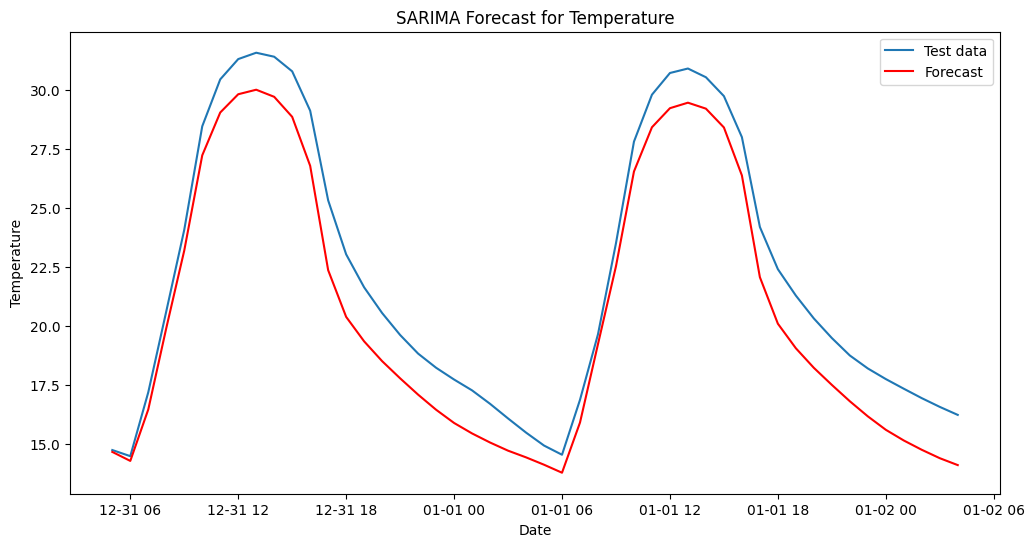

Root Mean Squared Error (RMSE): 1.7153024743807745
training now:  3


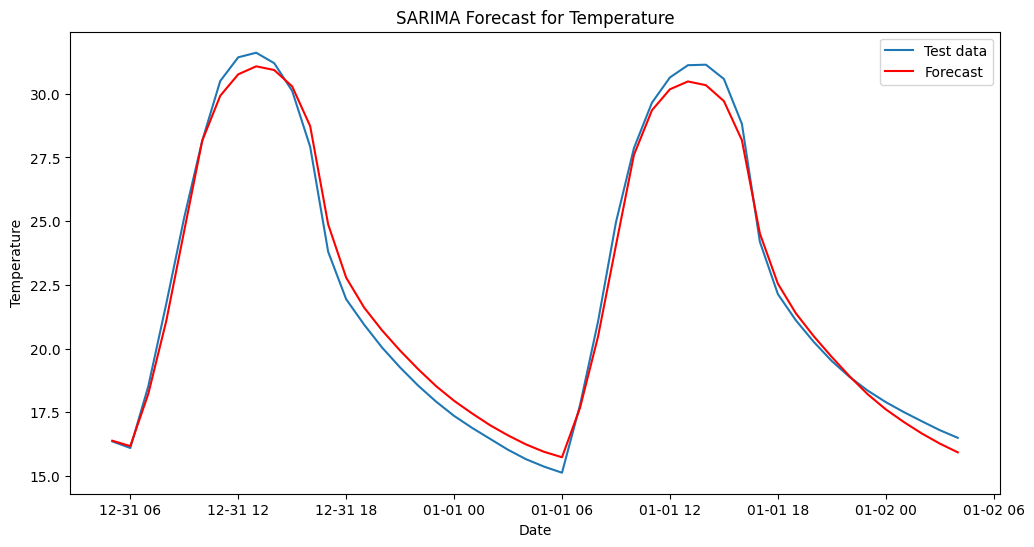

Root Mean Squared Error (RMSE): 0.5447042328002651
training now:  4


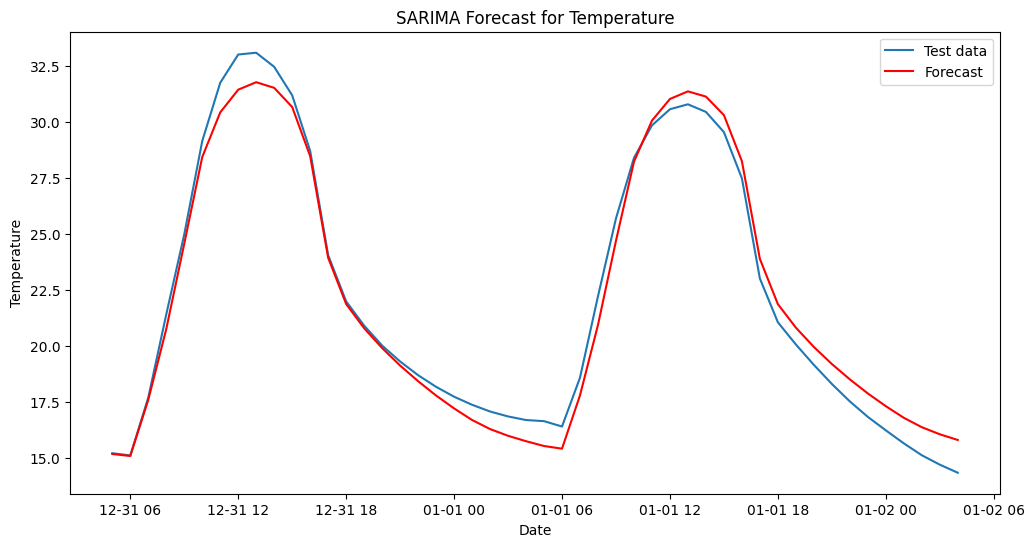

Root Mean Squared Error (RMSE): 0.8254713745657958
training now:  5


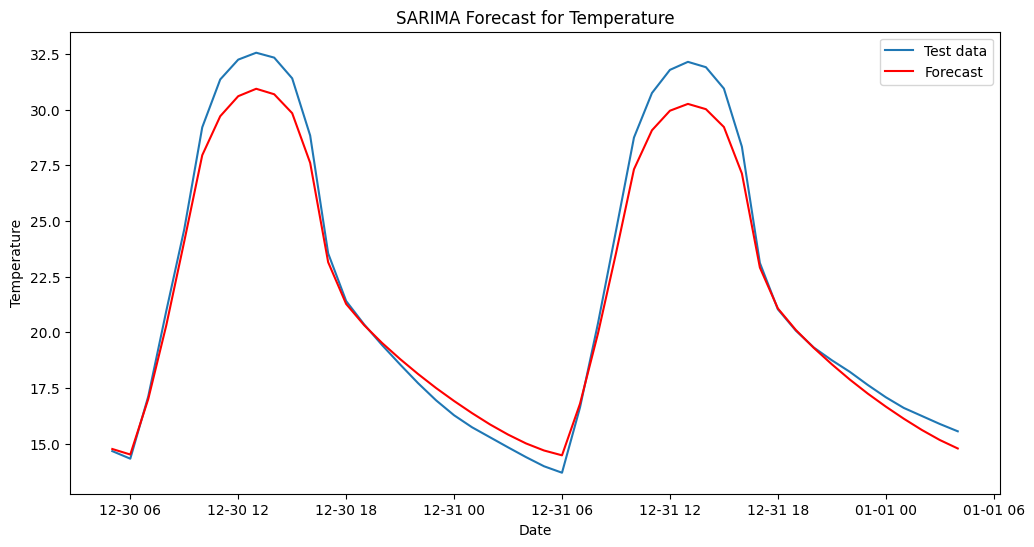

Root Mean Squared Error (RMSE): 0.9573140775709063
training now:  6


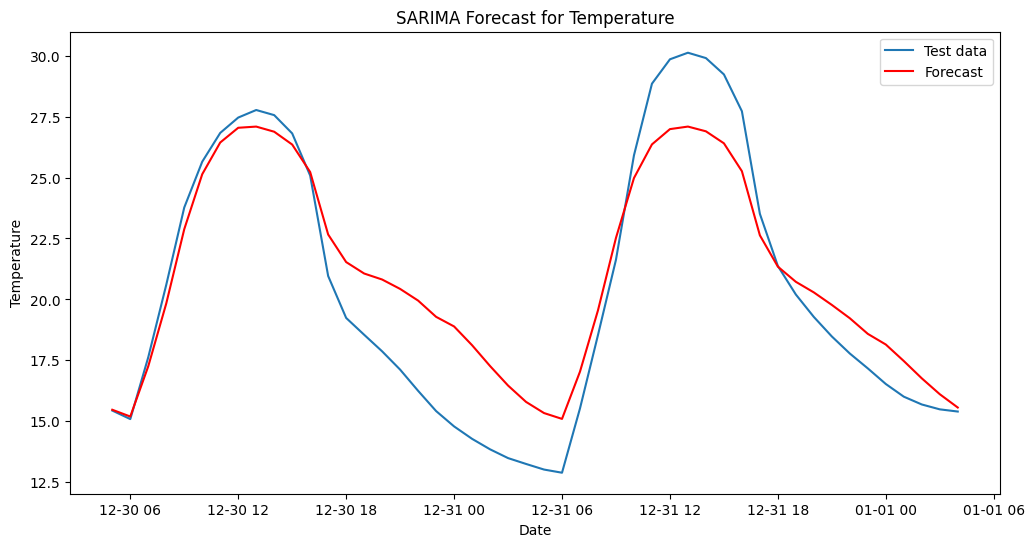

Root Mean Squared Error (RMSE): 2.0444820819309464
training now:  7


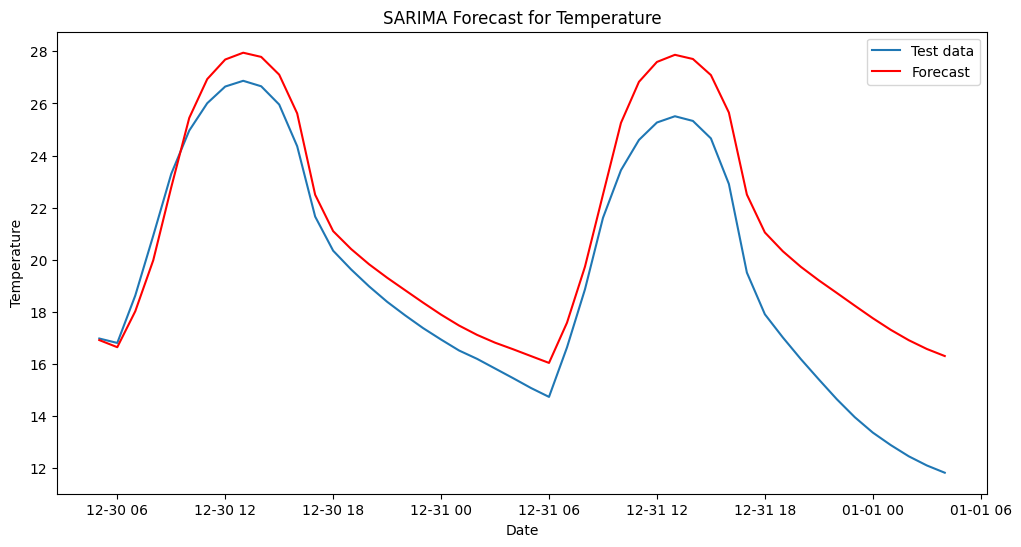

Root Mean Squared Error (RMSE): 2.298770191079024
training now:  8


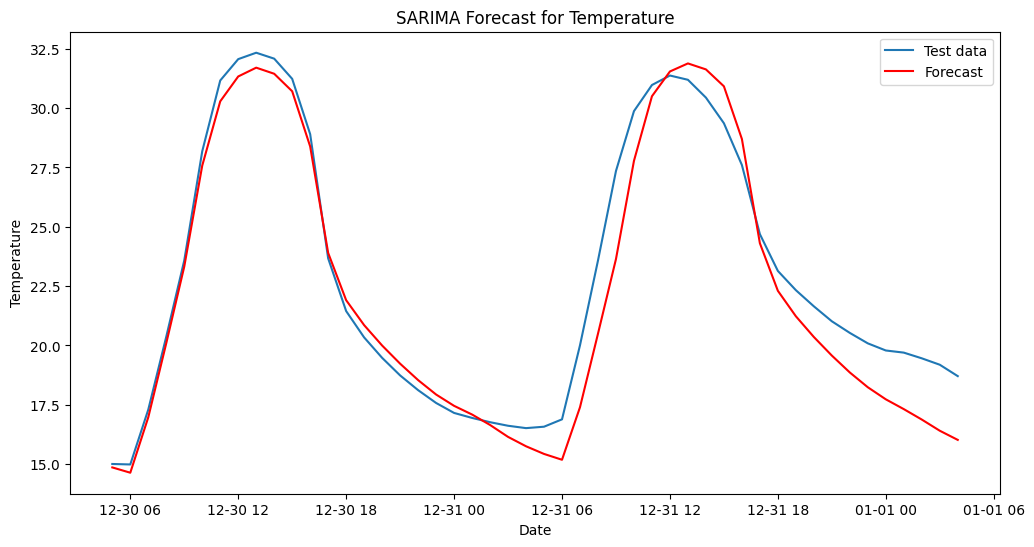

Root Mean Squared Error (RMSE): 1.3961619921430557
training now:  9


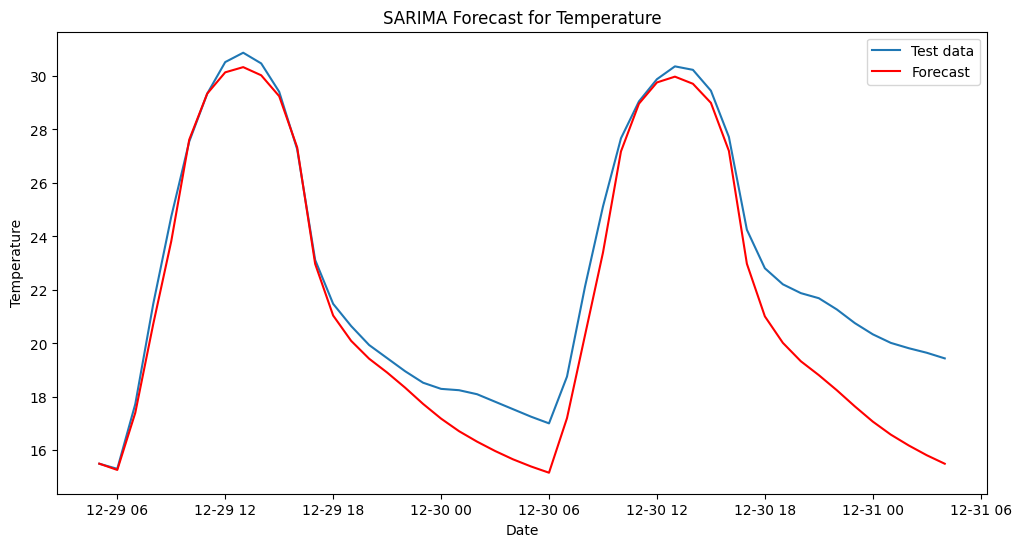

Root Mean Squared Error (RMSE): 1.7303640307856294
training now:  10


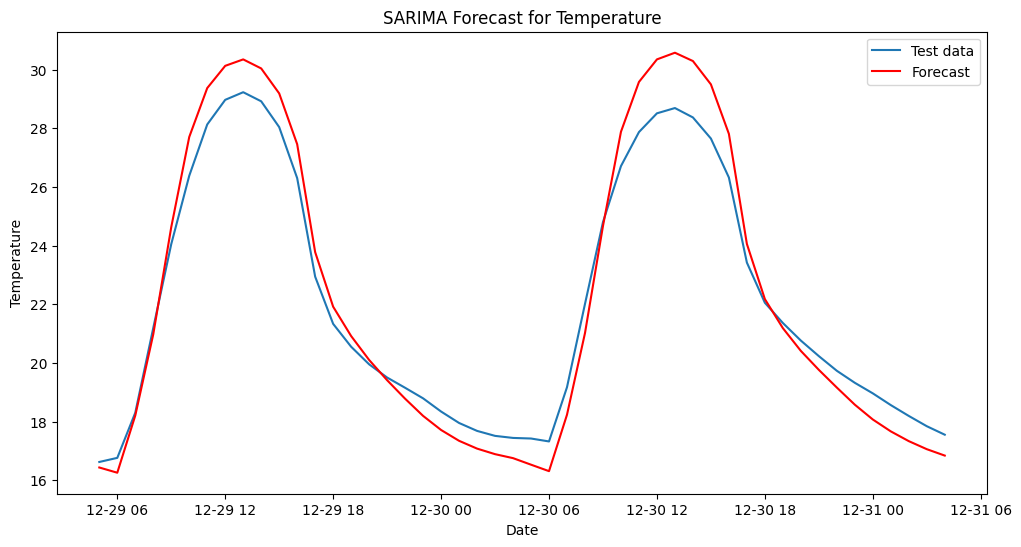

Root Mean Squared Error (RMSE): 0.952905877959322
training now:  11


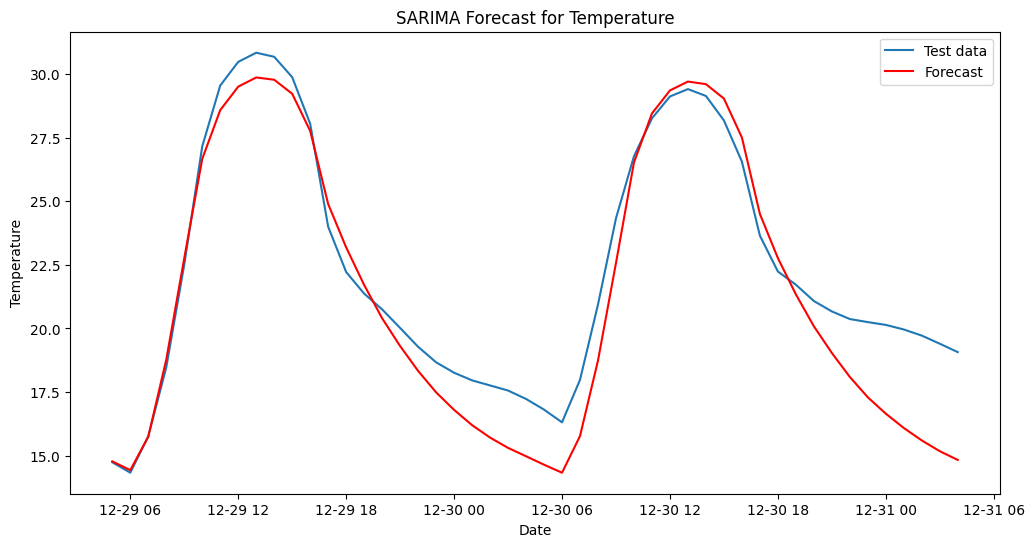

Root Mean Squared Error (RMSE): 1.7744190854523907
training now:  12


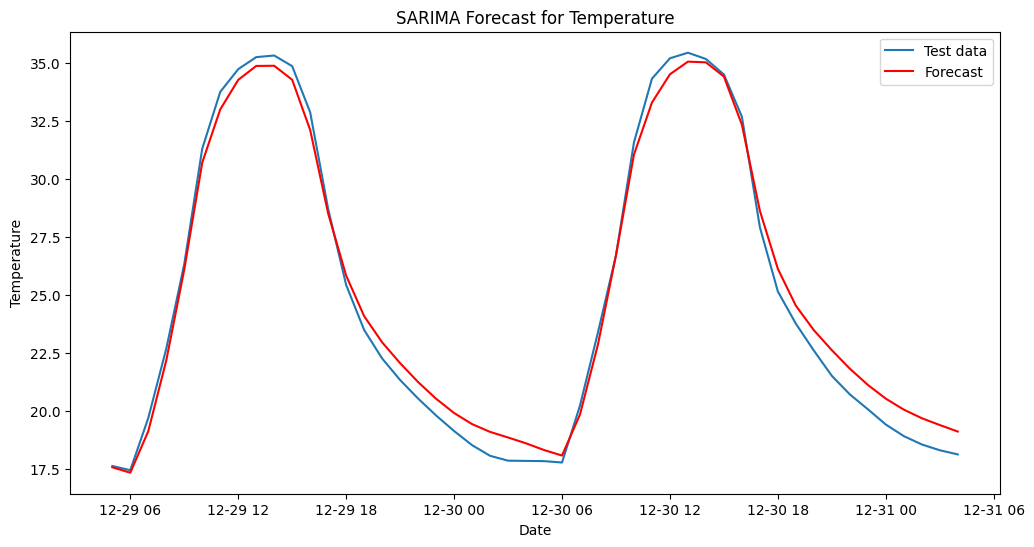

Root Mean Squared Error (RMSE): 0.7210314776798981
training now:  13


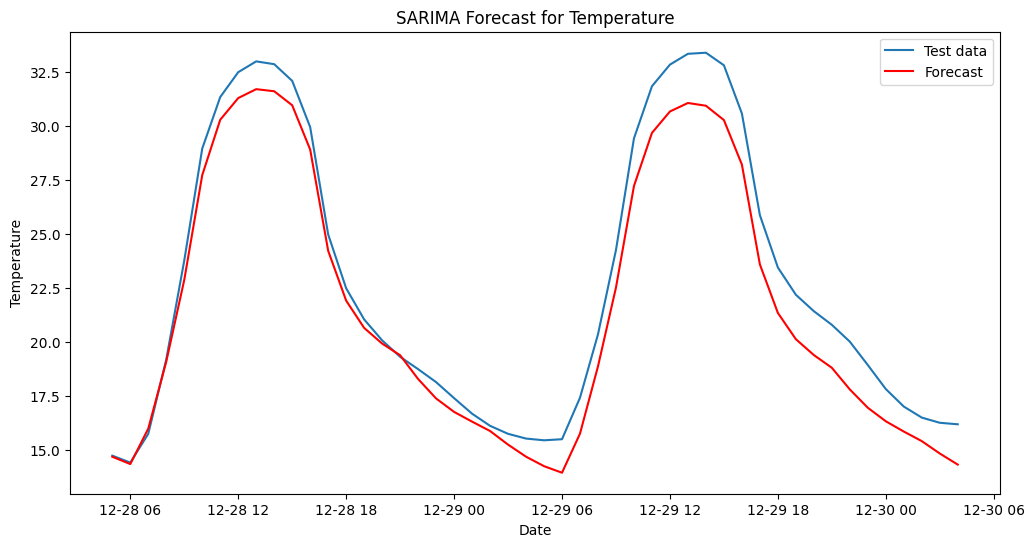

Root Mean Squared Error (RMSE): 1.4716404226991961
training now:  14


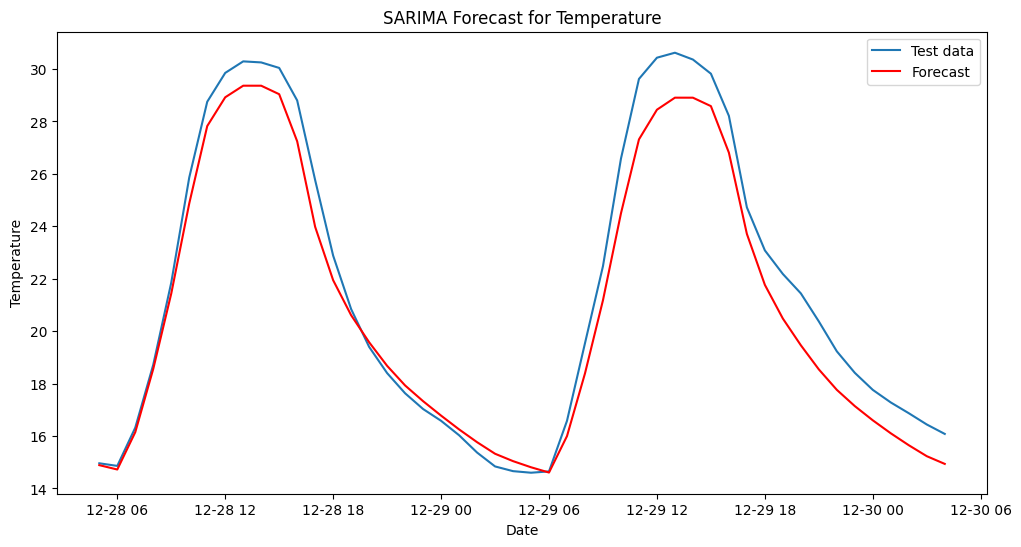

Root Mean Squared Error (RMSE): 1.1392204843919596
training now:  15


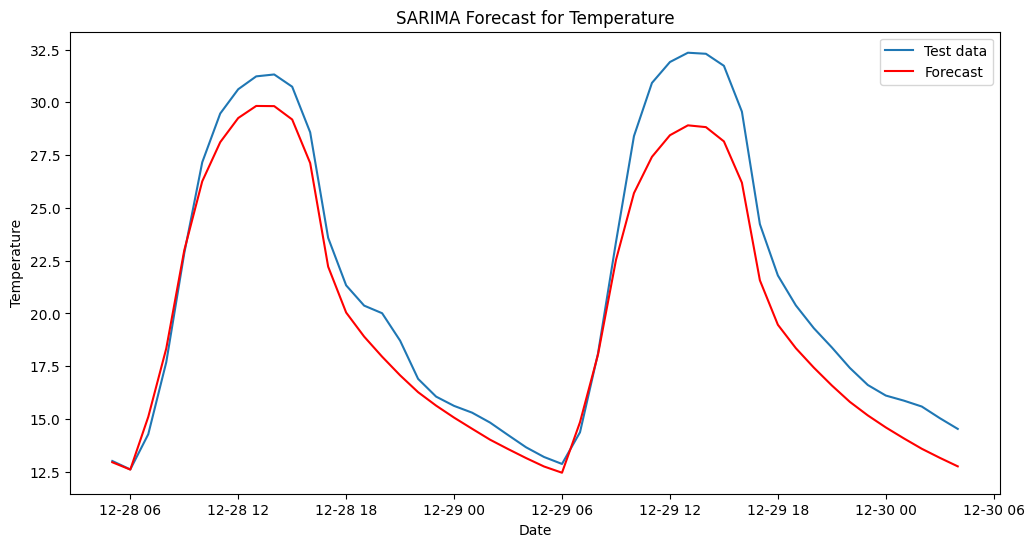

Root Mean Squared Error (RMSE): 1.7969124466194073
training now:  16


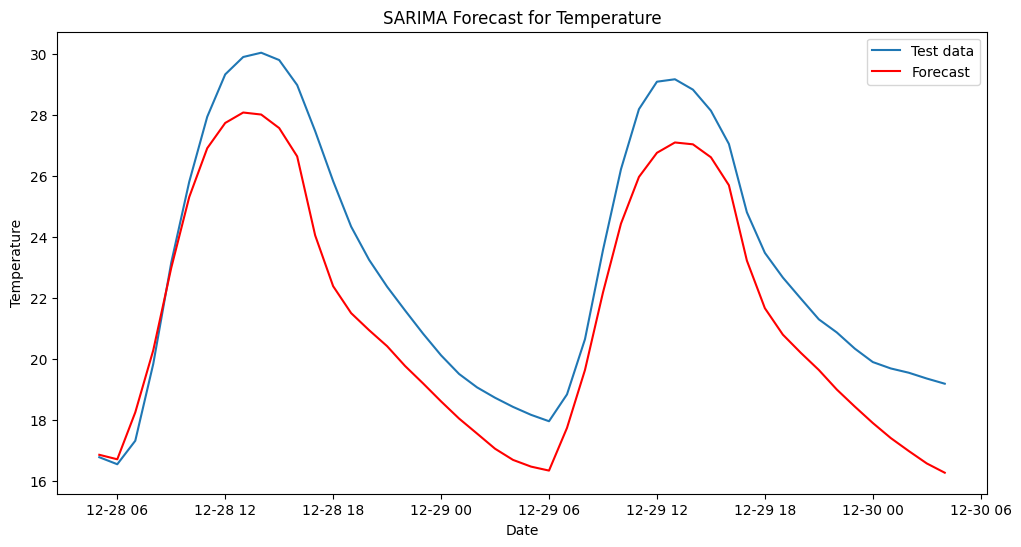

Root Mean Squared Error (RMSE): 1.8890327689190665
training now:  17


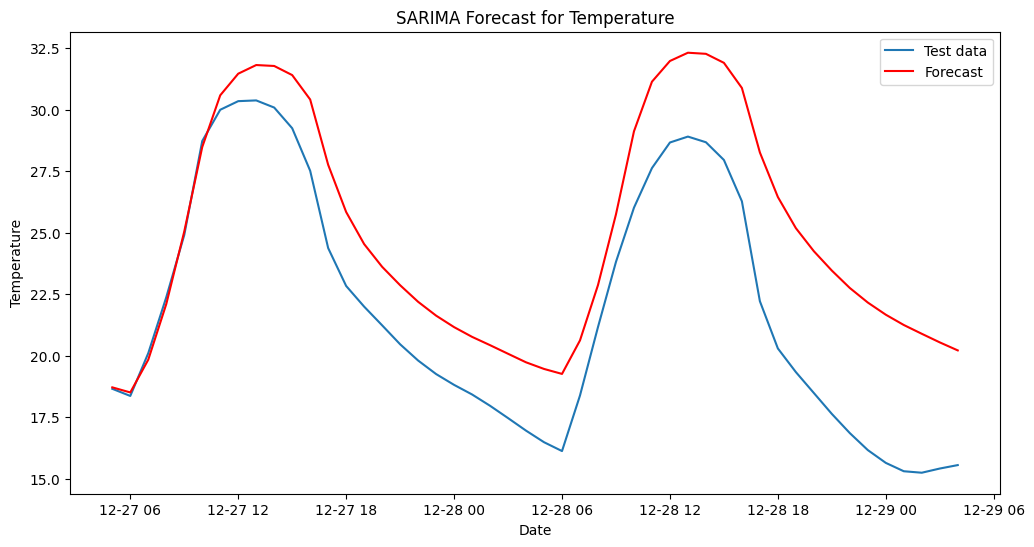

Root Mean Squared Error (RMSE): 3.6046338853464333
training now:  18


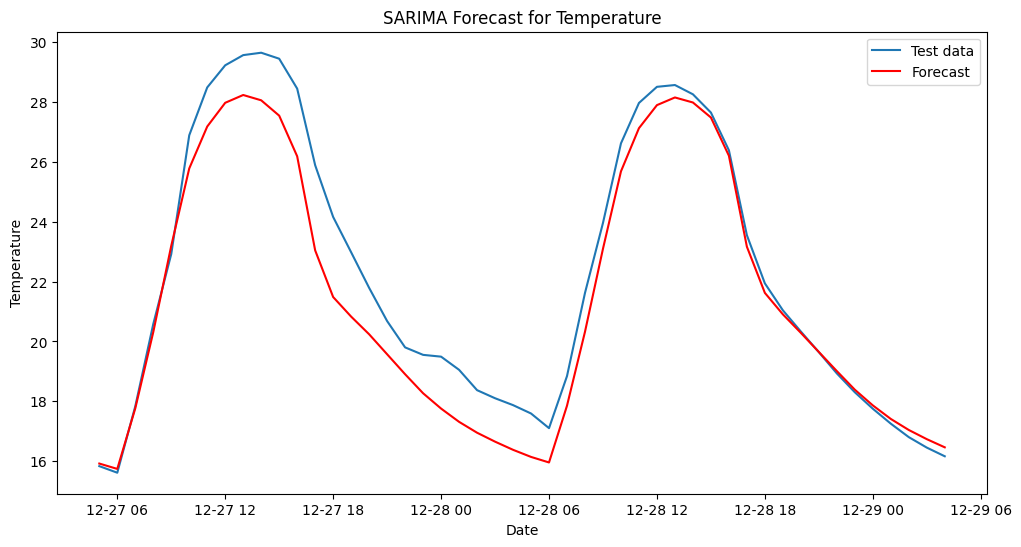

Root Mean Squared Error (RMSE): 1.170597912567655
training now:  19


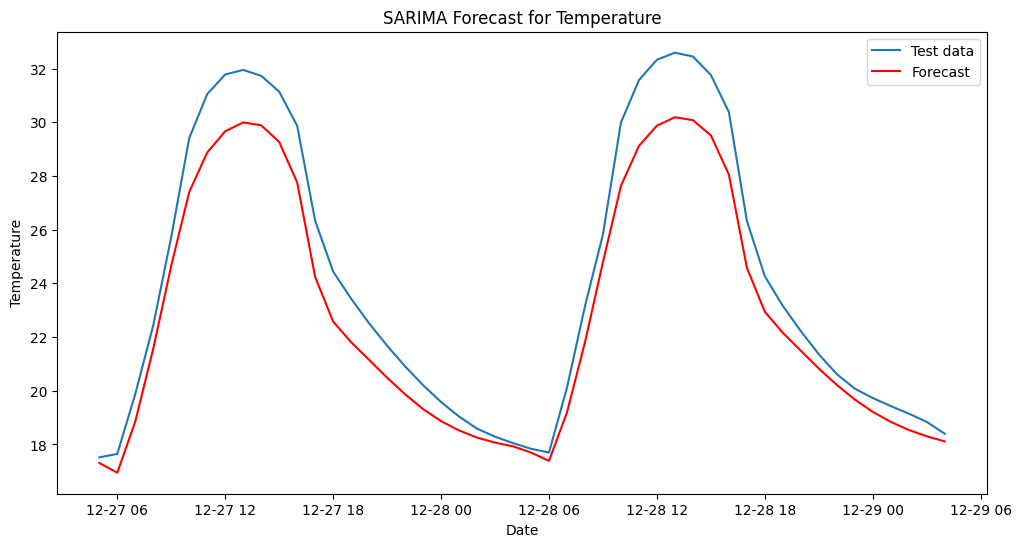

Root Mean Squared Error (RMSE): 1.4438619359378446
training now:  20


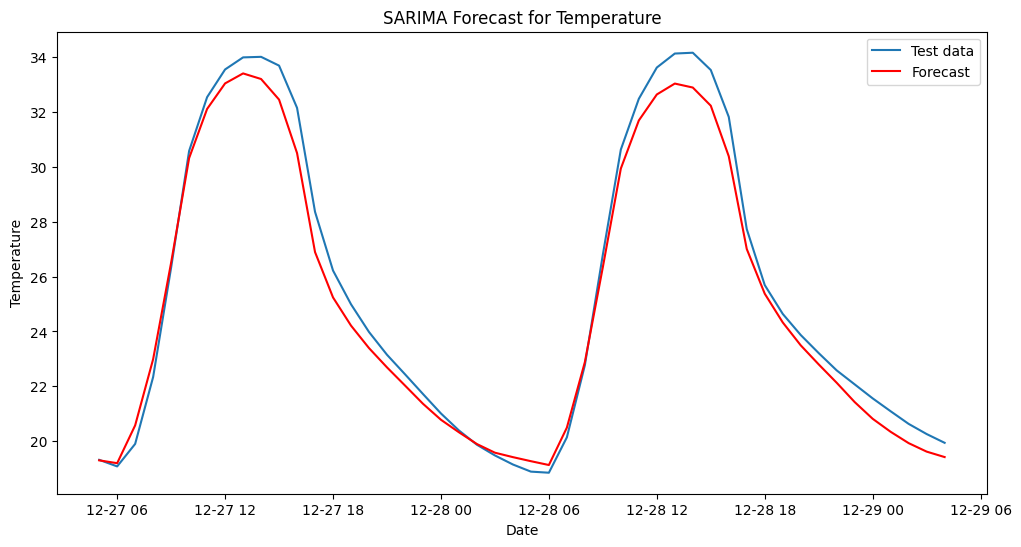

Root Mean Squared Error (RMSE): 0.714850260844874


In [30]:
for i in range(2, 21):
    #check2=train_data[table[i-2]:table[i-1]]
    #test2=train_data[table[i-1]:table[i-1]+48] #2 days = 48 hours
    # Splitting data into train and test sets
    train_data = data[table[i-2]:table[i-1]]  # 1 year data
    test_data = data[table[i-1]:table[i-1]+48]   # Use the last 48 hours for testing
    print("training now: ", i)
    #training
    mumbai_result=mumbai_result.extend(train_data["TEMP"])
    #forecasting
    forecast2 = mumbai_result.get_forecast(steps=48)
    # Plot the predicted values along with the actual values
    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index, test_data["TEMP"], label='Test data')
    plt.plot(forecast2.predicted_mean, label='Forecast', color='red')
    plt.title('SARIMA Forecast for Temperature')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.legend()
    plt.show()
    #RMSE
    rmse = np.sqrt(mean_squared_error(test_data["TEMP"], forecast2.predicted_mean))
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    # to store RMSE for every year
    rmse_record[i] = rmse

In [31]:
rmse_record

{1: 5.255863094985457,
 2: 1.7153024743807745,
 3: 0.5447042328002651,
 4: 0.8254713745657958,
 5: 0.9573140775709063,
 6: 2.0444820819309464,
 7: 2.298770191079024,
 8: 1.3961619921430557,
 9: 1.7303640307856294,
 10: 0.952905877959322,
 11: 1.7744190854523907,
 12: 0.7210314776798981,
 13: 1.4716404226991961,
 14: 1.1392204843919596,
 15: 1.7969124466194073,
 16: 1.8890327689190665,
 17: 3.6046338853464333,
 18: 1.170597912567655,
 19: 1.4438619359378446,
 20: 0.714850260844874}

In [32]:
forecast2.predicted_mean

2023-12-27 05:00:00    19.301618
2023-12-27 06:00:00    19.197499
2023-12-27 07:00:00    20.576203
2023-12-27 08:00:00    22.990161
2023-12-27 09:00:00    26.508138
2023-12-27 10:00:00    30.318757
2023-12-27 11:00:00    32.110723
2023-12-27 12:00:00    33.041691
2023-12-27 13:00:00    33.405558
2023-12-27 14:00:00    33.201962
2023-12-27 15:00:00    32.451123
2023-12-27 16:00:00    30.501785
2023-12-27 17:00:00    26.892541
2023-12-27 18:00:00    25.239418
2023-12-27 19:00:00    24.212643
2023-12-27 20:00:00    23.392884
2023-12-27 21:00:00    22.690334
2023-12-27 22:00:00    22.029331
2023-12-27 23:00:00    21.363992
2023-12-28 00:00:00    20.780431
2023-12-28 01:00:00    20.324162
2023-12-28 02:00:00    19.895095
2023-12-28 03:00:00    19.579976
2023-12-28 04:00:00    19.418241
2023-12-28 05:00:00    19.270503
2023-12-28 06:00:00    19.130722
2023-12-28 07:00:00    20.494446
2023-12-28 08:00:00    22.882167
2023-12-28 09:00:00    26.345616
2023-12-28 10:00:00    29.938174
2023-12-28

In [33]:
train_data=data[175200:]

In [34]:
mumbai_result=mumbai_result.extend(train_data["TEMP"])
forecast2 = mumbai_result.get_forecast(steps=48)


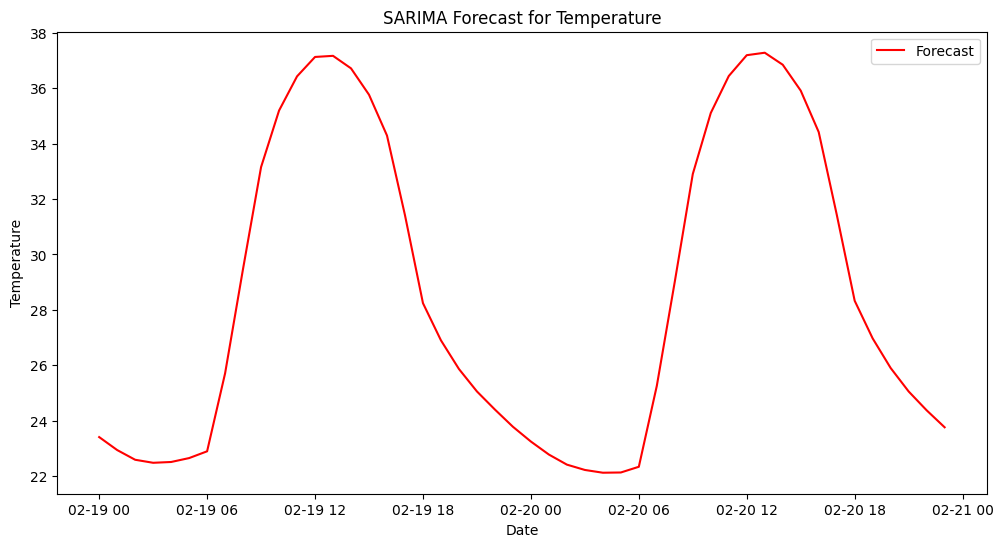

In [35]:
# Plot the predicted values along with the actual values
plt.figure(figsize=(12, 6))
#plt.plot(test_data.index, test_data["TEMP"], label='Test data')
plt.plot(forecast2.predicted_mean, label='Forecast', color='red')
plt.title('SARIMA Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [36]:
#saving pickle file of model
with open("/kaggle/working/mumbai_model.pkl", 'wb') as f:
    pickle.dump(mumbai_result, f)

In [37]:
forecast2.predicted_mean

2024-02-19 00:00:00    23.403140
2024-02-19 01:00:00    22.934846
2024-02-19 02:00:00    22.584086
2024-02-19 03:00:00    22.474670
2024-02-19 04:00:00    22.503748
2024-02-19 05:00:00    22.644870
2024-02-19 06:00:00    22.889461
2024-02-19 07:00:00    25.705557
2024-02-19 08:00:00    29.486694
2024-02-19 09:00:00    33.155102
2024-02-19 10:00:00    35.196897
2024-02-19 11:00:00    36.432321
2024-02-19 12:00:00    37.132697
2024-02-19 13:00:00    37.173066
2024-02-19 14:00:00    36.720430
2024-02-19 15:00:00    35.768987
2024-02-19 16:00:00    34.294199
2024-02-19 17:00:00    31.416619
2024-02-19 18:00:00    28.239486
2024-02-19 19:00:00    26.896726
2024-02-19 20:00:00    25.861888
2024-02-19 21:00:00    25.051759
2024-02-19 22:00:00    24.397293
2024-02-19 23:00:00    23.776357
2024-02-20 00:00:00    23.241858
2024-02-20 01:00:00    22.772292
2024-02-20 02:00:00    22.408615
2024-02-20 03:00:00    22.215934
2024-02-20 04:00:00    22.115958
2024-02-20 05:00:00    22.124536
2024-02-20